# Micro Credit Fraud Analysis

# Introduction

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. Microfinance services (MFS) becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The MFS provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using micro financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry from Indonesia. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

The dataset contains 209593 rows and 37 columns. The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

Task: Classification

Target: Label column

# Data Preprocessing

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
df=pd.read_csv("micro_credit.csv")
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
# checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [4]:
#Checking Datatypes 
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
# changing the Date column into actual date format

df['pdate'] = pd.to_datetime(df['pdate'])
df.pdate.head()

0   2016-07-20
1   2016-08-10
2   2016-08-19
3   2016-06-06
4   2016-06-22
Name: pdate, dtype: datetime64[ns]

In [6]:
#Splitting time stamp format data to day, month & year

df["day"]=df["pdate"].dt.day
df["month"]=df["pdate"].dt.month
df["year"]=df["pdate"].dt.year
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle      pdate  day  month  year  
0      UPW 2016-07-20   20      7  2016  
1      UPW 2016-08-10   10      8  2016  
2      UPW 2016-08-19   19      8  2016  
3      UPW 2016-06-06    6      6  2016  
4      UPW 2016-06-22   22      6  2016  

[5 rows x 40 columns]

In [7]:
# checking for unique values and their value counts
for col in df:
    print((col),df[col].unique())
    print(df[col].value_counts())
    print('******************************************************************************************')
    print('\n')

Unnamed: 0 [     1      2      3 ... 209591 209592 209593]
2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64
******************************************************************************************


label [0 1]
1    183431
0     26162
Name: label, dtype: int64
******************************************************************************************


msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
43096I88688    6
29191I82738    6
60744I91197    6
              ..
33838I84458    1
83783I90847    1
38815I82736    1
86571I70378    1
62933I84457    1
Name: msisdn, Length: 186243, dtype: int64
******************************************************************************************


aon [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.118813

fr_da_rech30 [0.00000000e+00 7.23845092e+05 9.00000000e+00 ... 7.44924811e+05
 7.04094118e+05 5.09386303e+05]
0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
738055.326743         1
811998.243560         1
792892.884579         1
540679.626283         1
849620.029563         1
Name: fr_da_rech30, Length: 1072, dtype: int64
******************************************************************************************


cnt_da_rech90 [ 0  1  3  2  5  6  8  4 27  7  9 14 12 22 13 10 16 19 11 15 38 18 20 30
 28 25 17]
0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64
***

We observed that 'maxamnt_loans30' has value other than 0,6,12 which is not possible so replace those other values by 6 and
'cnt_loans90' has extremly large entries so del all that rows.

In [8]:
# count the amounts of given entries in a column
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [9]:
df['maxamnt_loans30'].loc[(df['maxamnt_loans30'] > 12)] = 6

In [10]:
# check the count again
df['maxamnt_loans30'].value_counts()

6.0     180240
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [11]:
# count the amounts of given entries in a column
df['cnt_loans90'].value_counts()

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
4876.239599        1
Name: cnt_loans90, Length: 1110, dtype: int64

In [12]:
# Remove rows that have larger values for cnt_loans90 than 3 times that of the max cnt_loans30 value (50)
df = df[~(df['cnt_loans90'] > 150)]

In [13]:
# checking the count again
df['cnt_loans90'].value_counts()

1.0     73862
2.0     37286
3.0     23986
4.0     16761
5.0     12331
        ...  
62.0        1
59.0        1
56.0        1
58.0        1
68.0        1
Name: cnt_loans90, Length: 63, dtype: int64

In [14]:
df.shape

(208546, 40)

We have 0.5 % data loss

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208546 entries, 0 to 209592
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            208546 non-null  int64         
 1   label                 208546 non-null  int64         
 2   msisdn                208546 non-null  object        
 3   aon                   208546 non-null  float64       
 4   daily_decr30          208546 non-null  float64       
 5   daily_decr90          208546 non-null  float64       
 6   rental30              208546 non-null  float64       
 7   rental90              208546 non-null  float64       
 8   last_rech_date_ma     208546 non-null  float64       
 9   last_rech_date_da     208546 non-null  float64       
 10  last_rech_amt_ma      208546 non-null  int64         
 11  cnt_ma_rech30         208546 non-null  int64         
 12  fr_ma_rech30          208546 non-null  float64       
 13 

In [16]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'day', 'month', 'year'],
      dtype='object')

In [17]:
# dropping the unnecessary columns
df.drop('Unnamed: 0',axis=1,inplace=True)  # index column we also have already in our dataframe
df.drop('msisdn',axis=1,inplace=True)      # contains phone numbers not so relevant 
df.drop('pdate',axis=1,inplace=True)       # we already split this column to day, month, year 
df.drop('year',axis=1,inplace=True)        # contains same value i,e '2016' in every row
df.drop('pcircle',axis=1,inplace=True)     # contains same value i.e 'UPW' in every row

In [18]:
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  day  month  
0                     6                 0.0  29.000000  29.000000   20      7  
1                    12                 0.0   0.000000   0.000000   10      8  
2                     6                 0.0   0.000000   0.000000   19      8  
3                     6                 0.0   0.000000   0.000000    6      6  
4                     6                 0.0   2.333333   2.333333   22      6  
...                 ...                 ...        ...        ...  ...    ...  
209588                6                 0.0   1.000000   1.000000   17      6  
209589                6                 0.0   1.000000   1.000000   12      6  
209590               12                 0.0   4.000000   3.833333   29      7  
209591               12                 0.0   0.000000  10.500000   25      7  
209592               12                 0.0   0.000000   0.000000    7      7  

[208546 rows x 35 columns]

In [19]:
# Statistical Information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe()

label            aon   daily_decr30   daily_decr90  \
count  208546.000000  208546.000000  208546.000000  208546.000000   
mean        0.875145    8106.644689    5380.433238    6081.038558   
std         0.330555   75687.847919    9222.616484   10920.285425   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     245.000000      42.460083      42.697667   
50%         1.000000     526.000000    1470.000000    1500.000000   
75%         1.000000     981.000000    7242.771417    7799.570000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  208546.000000  208546.000000      208546.000000      208546.000000   
mean     2692.496806    3482.968845        3756.990551        3716.353389   
std      4309.726307    5770.117940       53916.829682       53404.066982   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.215000     300.260000           1.000000           0.000000   
50%      1083.475000    1333.940000           3.000000           0.000000   
75%      3355.877500    4202.357500           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     208546.000000  208546.000000  208546.000000      208546.000000   
mean        2064.430936       3.976739    3716.172445        7702.743596   
std         2371.403497       4.255271   53488.952658       10143.080800   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         208546.000000         208546.000000  208546.000000   
mean            1812.913024           3850.240834       6.313183   
std             2071.369275          53977.865297       7.192453   
min                0.000000           -200.000000       0.000000   
25%              770.000000             11.000000       2.000000   
50%             1539.000000             33.900000       4.000000   
75%             1924.000000             83.000000       8.000000   
max            55000.000000         999479.419319     336.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  208546.000000      208546.000000         208546.000000   
mean        7.717501       12392.131544           1864.392652   
std        12.590395       16859.175076           2081.713072   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         208546.000000  208546.000000  208546.000000  208546.000000   
mean              92.052085     263.259808    3749.602297       0.041511   
std              369.669346    4188.609462   53883.486706       0.397923   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.300000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  208546.000000  208546.000000  208546.000000    20854

we observe that in most of the columns standard deviation is more than mean which means outliers are present in our dataset so 
we will remove these outliers in eda and also aon contains negative value which is not possible in real as days never be negative. We will change this aon column positive now.

In [20]:
# converting aon column to positive using absolute
df['aon']=np.abs(df['aon'])

# Data Vizualization

UNIVARIATE ANALYSIS

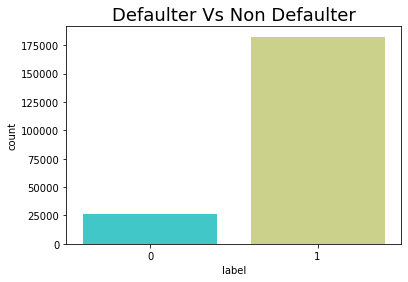

1    182508
0     26038
Name: label, dtype: int64


 0 - Failure 
 1 - Success


In [21]:
#Checking the number of defaulter and non defaulter.

sns.countplot(x='label', data=df, palette='rainbow')
plt.title('Defaulter Vs Non Defaulter', fontsize=18)
plt.show()

print(df['label'].value_counts())
print('\n')
print(' 0 - Failure', '\n', '1 - Success')

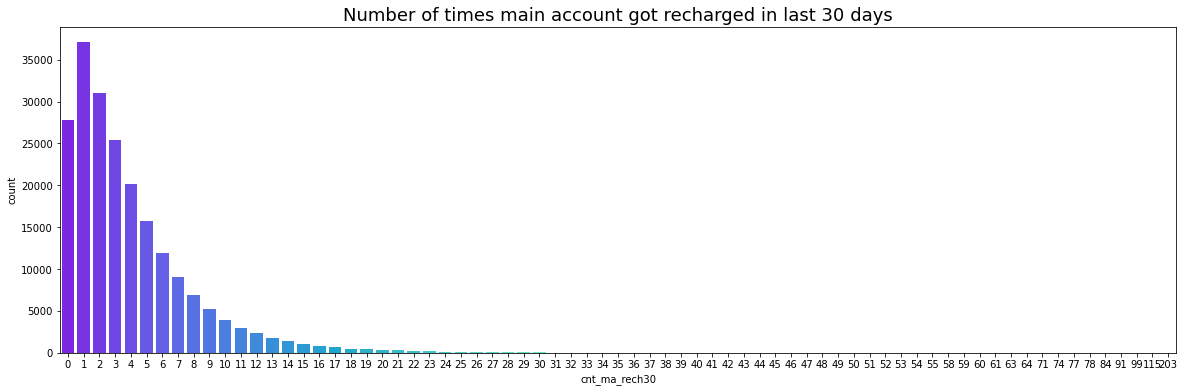

In [22]:
#Checking the number of recharges in last 30 days.

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_ma_rech30', data=df, palette='rainbow')
plt.title('Number of times main account got recharged in last 30 days', fontsize=18)
plt.show()

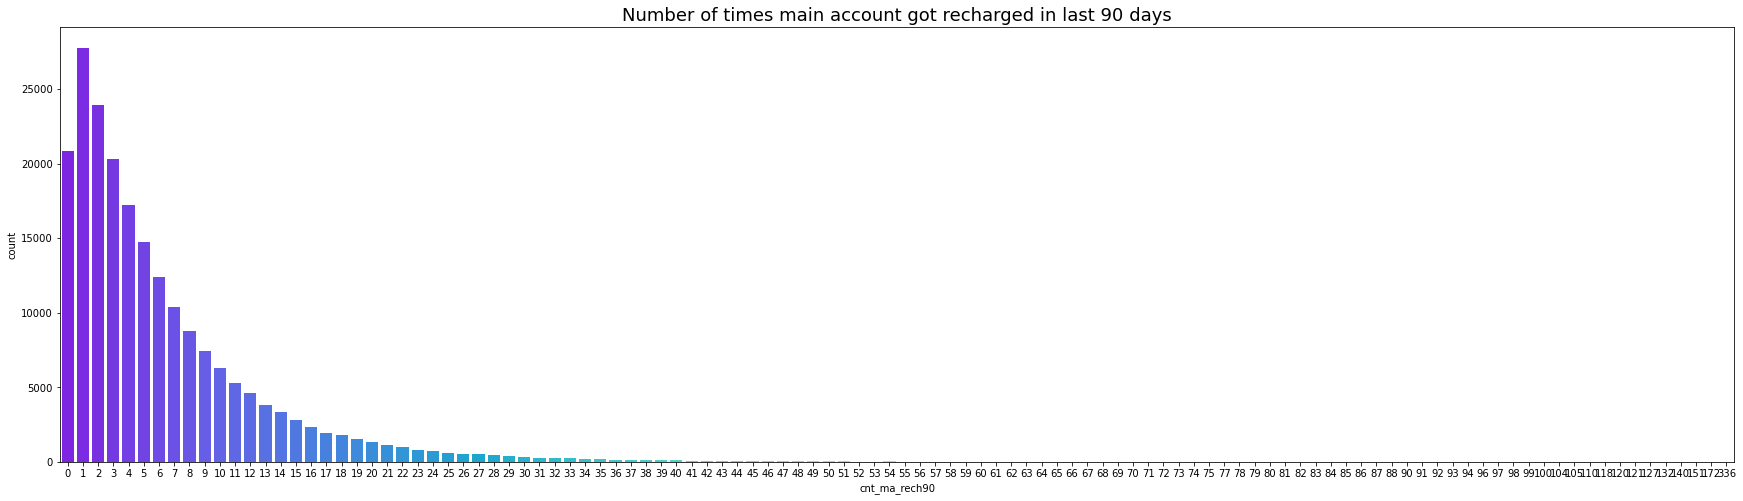

In [23]:
#Checking the number of recharges in last 90 days.

plt.subplots(figsize=(30,8))
sns.countplot(x='cnt_ma_rech90', data=df, palette='rainbow')
plt.title('Number of times main account got recharged in last 90 days', fontsize=18)
plt.show()

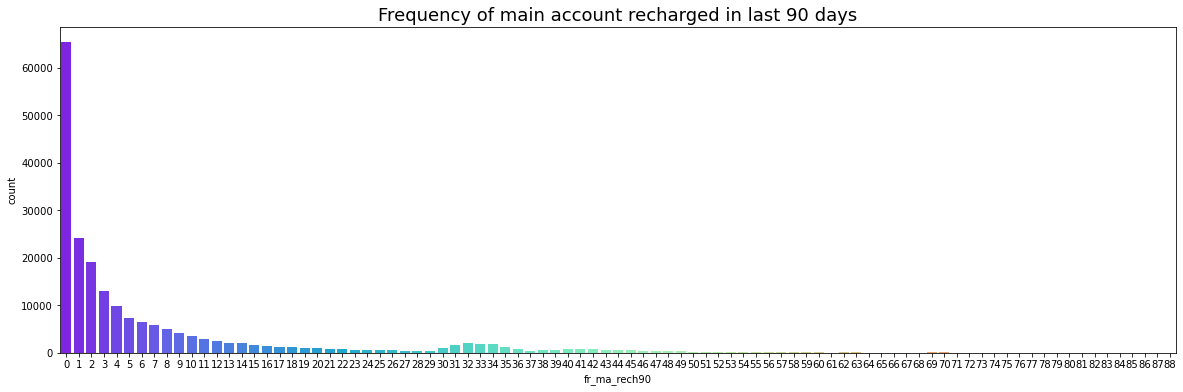

In [24]:
#Checking the Frequency of main account recharged in last 90 days

plt.subplots(figsize=(20,6))
sns.countplot(x='fr_ma_rech90', data=df, palette='rainbow')
plt.title('Frequency of main account recharged in last 90 days', fontsize=18)
plt.show()

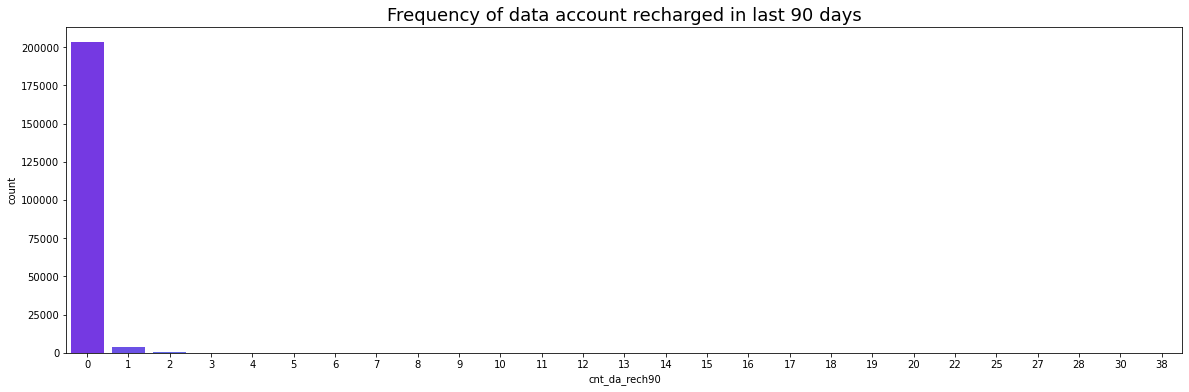

In [25]:
#Checking the Frequency of data account recharged in last 90 days

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_da_rech90', data=df, palette='rainbow')
plt.title('Frequency of data account recharged in last 90 days', fontsize=18)
plt.show()

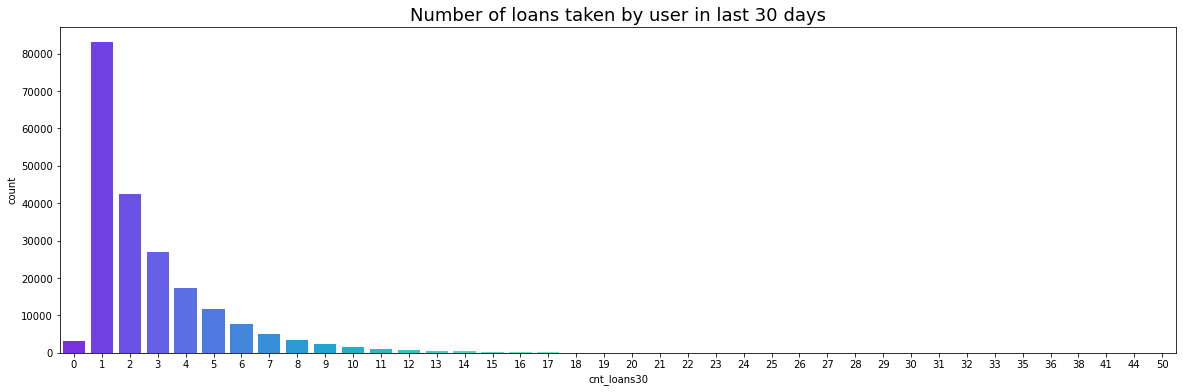

In [26]:
#Checking the Number of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_loans30', data=df, palette='rainbow')
plt.title('Number of loans taken by user in last 30 days', fontsize=18)
plt.show()

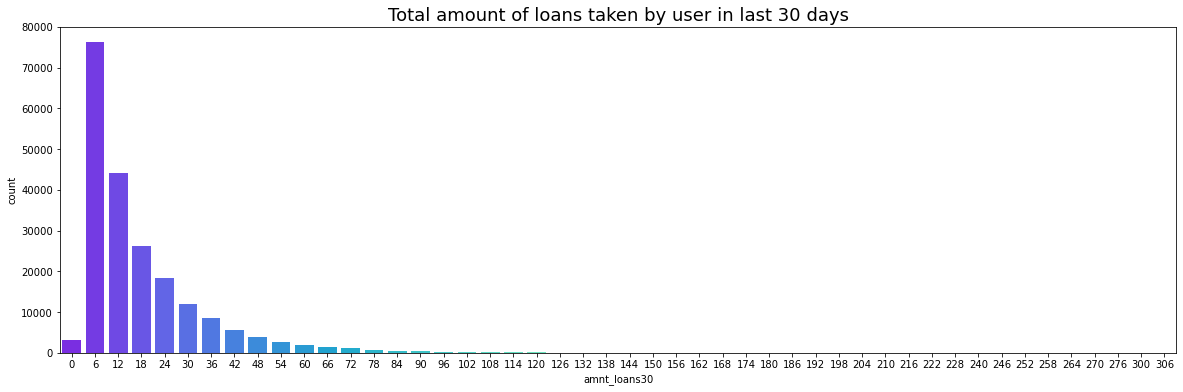

In [27]:
#Checking the Number of Total amount of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='amnt_loans30', data=df, palette='rainbow')
plt.title('Total amount of loans taken by user in last 30 days', fontsize=18)
plt.show()

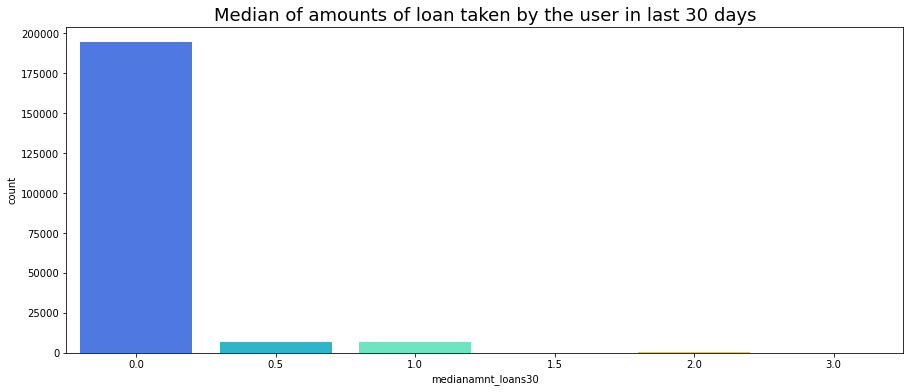

0.0    194461
1.0      7116
0.5      6509
2.0       419
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


In [28]:
#Checking the Number of Median of amounts of loan taken by the user in last 30 days

plt.subplots(figsize=(15, 6))
sns.countplot(x='medianamnt_loans30', data=df, palette='rainbow')
plt.title('Median of amounts of loan taken by the user in last 30 days', fontsize=18)
plt.show()

print(df['medianamnt_loans30'].value_counts())

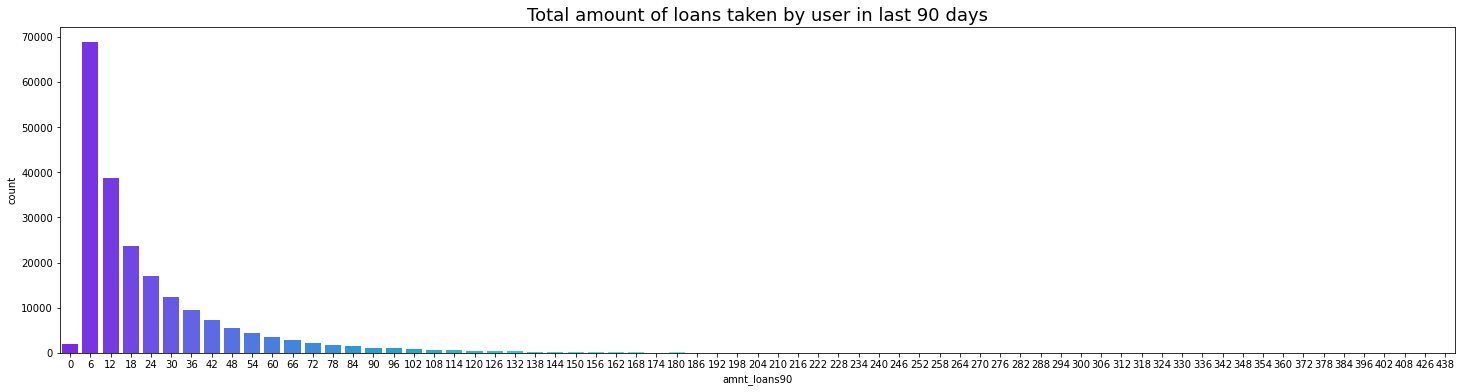

In [29]:
#Checking the Number of Total amount of loans taken by user in last 90 days

plt.subplots(figsize=(25, 6))
sns.countplot(x='amnt_loans90', data=df, palette='rainbow')
plt.title('Total amount of loans taken by user in last 90 days', fontsize=18)
plt.show()

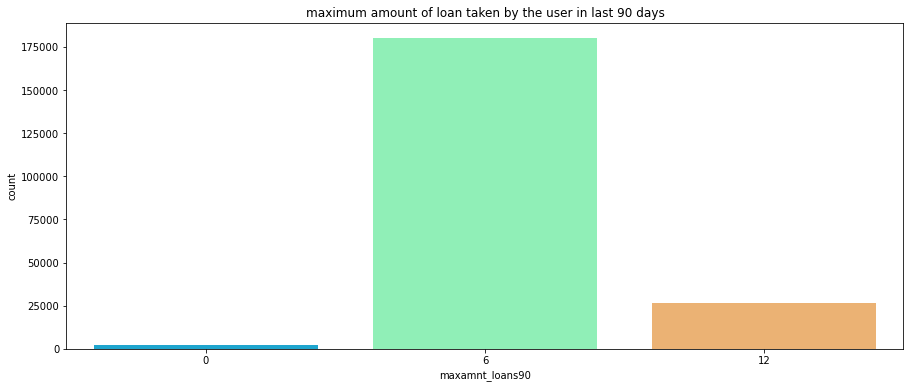

6     180030
12     26480
0       2036
Name: maxamnt_loans90, dtype: int64


In [30]:
#Checking the maximum amount of loan taken by the user in last 90 days
plt.subplots(figsize=(15, 6))
sns.countplot(x='maxamnt_loans90', data=df, palette='rainbow')
plt.title('maximum amount of loan taken by the user in last 90 days', fontsize=12)
plt.show()

print(df['maxamnt_loans90'].value_counts())

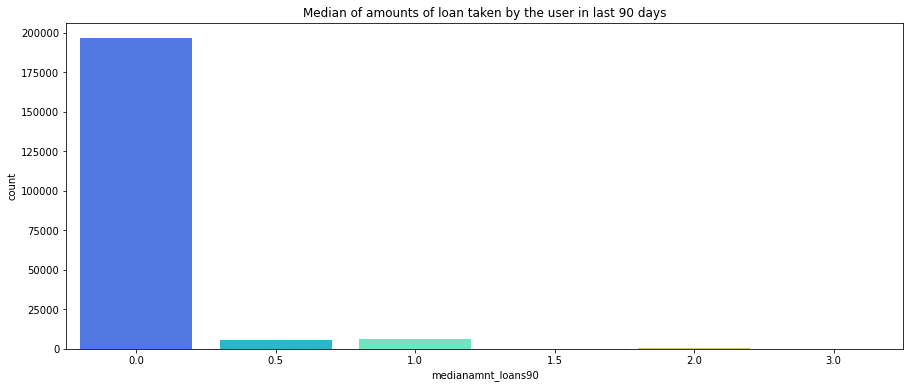

0.0    196436
1.0      6142
0.5      5640
2.0       306
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


In [31]:
#Checking the Median of amounts of loan taken by the user in last 90 days

plt.subplots(figsize=(15, 6))
sns.countplot(x='medianamnt_loans90', data=df, palette='rainbow')
plt.title('Median of amounts of loan taken by the user in last 90 days', fontsize=12)
plt.show()

print(df['medianamnt_loans90'].value_counts())

BIVARIATE ANALYSIS

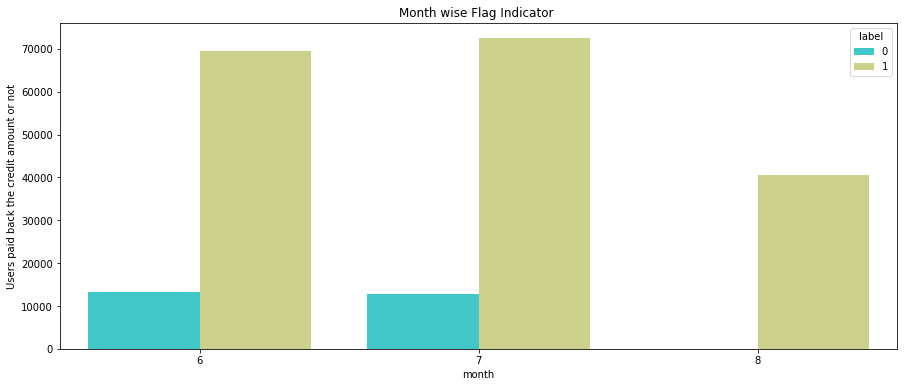

month  label
6      1        69531
       0        13202
7      1        72506
       0        12836
8      1        40471
Name: label, dtype: int64


In [32]:
#Month wise Flag Indicator i.e user paid back the credit amount within 5 days of issuing the loan

plt.subplots(figsize=(15, 6))
sns.countplot(x='month', hue ='label', data=df, palette='rainbow')
plt.title('Month wise Flag Indicator ')
plt.ylabel('Users paid back the credit amount or not')
plt.show()

print(df.groupby('month')['label'].value_counts())

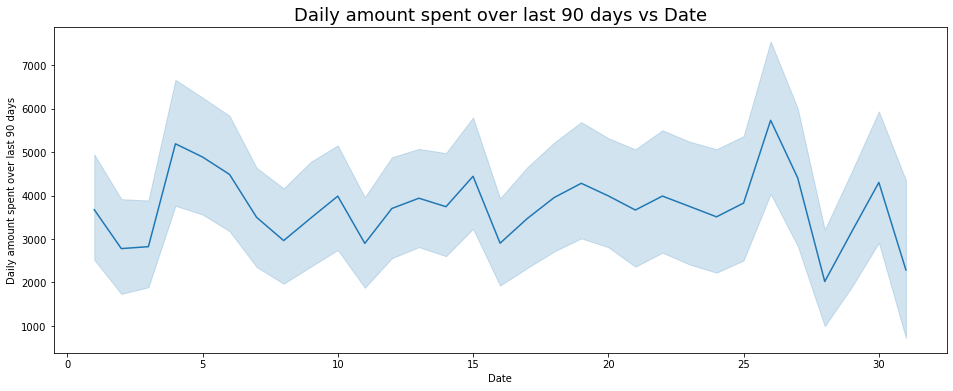

In [33]:
#using lineplot from seaborn to check Daily amount spent from main account, averaged over last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="last_rech_date_ma", data=df)
plt.ylabel('Daily amount spent over last 90 days')
plt.xlabel('Date')

plt.title("Daily amount spent over last 90 days vs Date", fontsize=18)
plt.show()

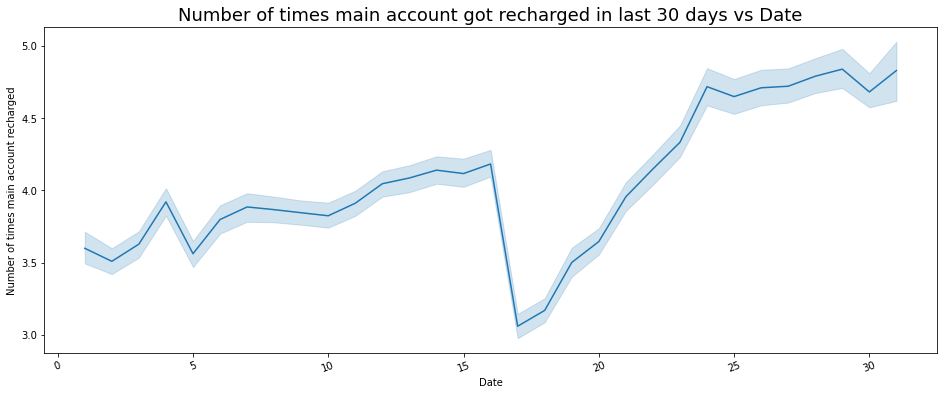

In [34]:
#using lineplot from seaborn to check Number of times main account got recharged in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="cnt_ma_rech30", data=df)
plt.ylabel('Number of times main account recharged')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.title("Number of times main account got recharged in last 30 days vs Date", fontsize=18)
plt.show()

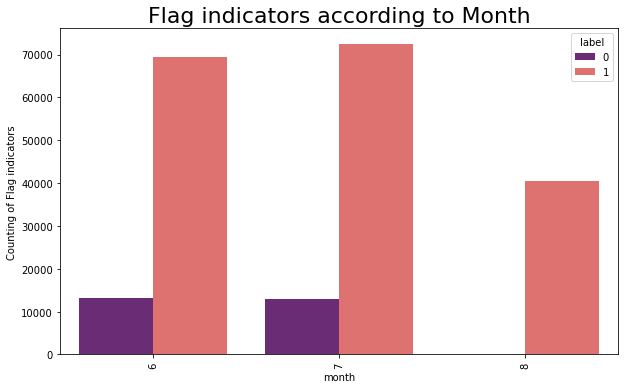

In [35]:
#Flag indicators according to Month

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='label', data=df, palette='magma')
plt.title("Flag indicators according to Month", fontsize=22)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

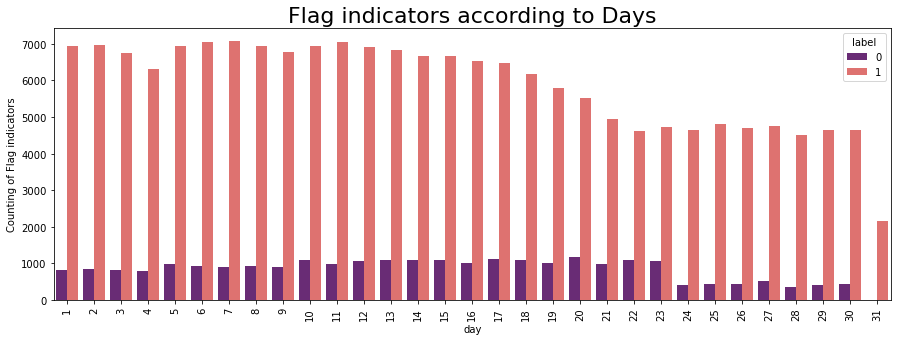

In [36]:
#Flag indicators according to days

plt.figure(figsize=(15, 5))
sns.countplot(x='day', hue='label', data=df, palette='magma')
plt.title("Flag indicators according to Days", fontsize=22)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

Multivariate

Text(0.5, 1.0, 'maxamnt_loans90 VS aon')

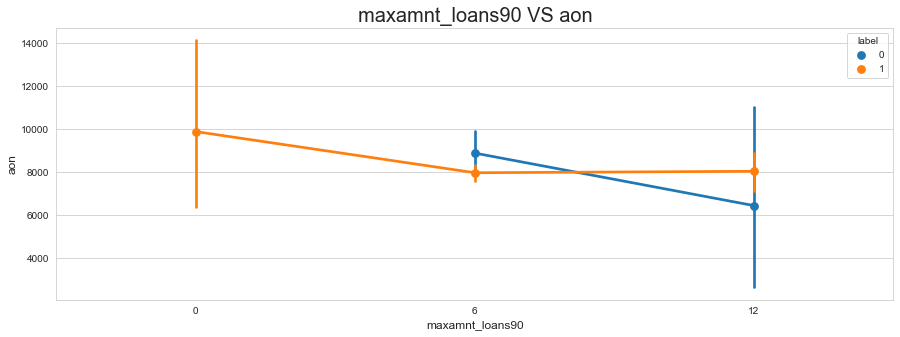

In [37]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='aon', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('aon',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS aon",{'fontsize':20})

Text(0.5, 1.0, 'maxamnt_loans90 VS payback90')

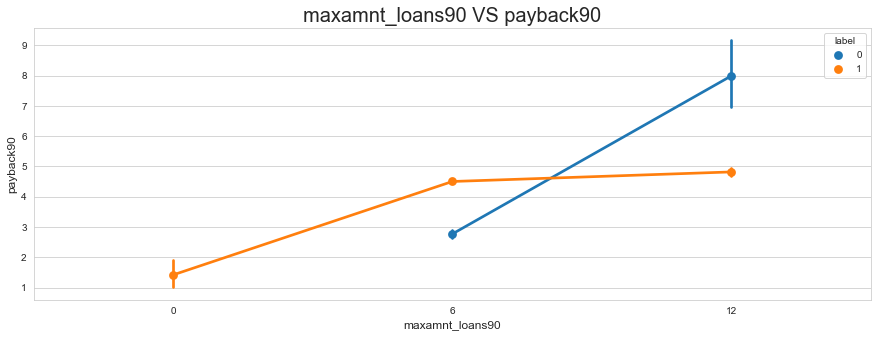

In [38]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='payback90', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('payback90',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS payback90",{'fontsize':20})

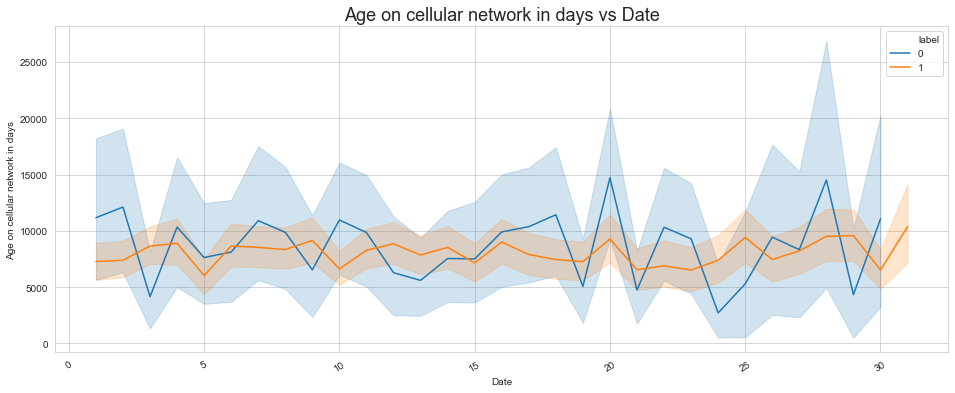

In [39]:
#using lineplot from seaborn to check age on cellular network in days vs aon

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="aon",hue='label', data=df)
plt.ylabel('Age on cellular network in days')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.title("Age on cellular network in days vs Date", fontsize=18)
plt.show()

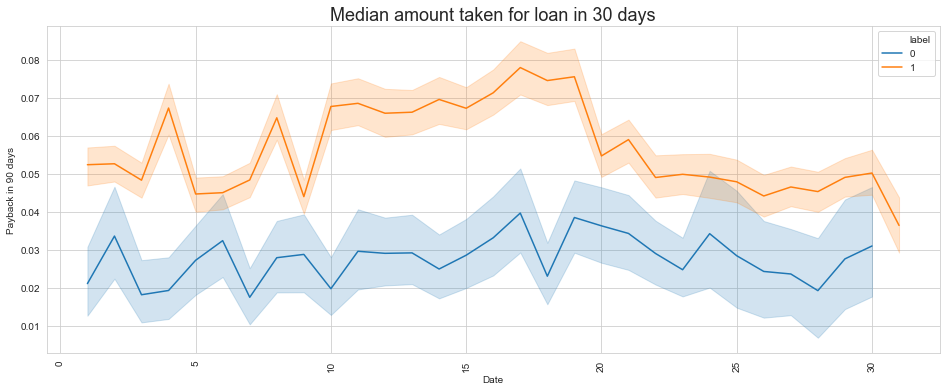

In [40]:
#using lineplot from seaborn to check age on cellular network in days vs medianamnt_loans30
plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="medianamnt_loans30",hue='label', data=df)
plt.ylabel('Payback in 90 days')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Median amount taken for loan in 30 days", fontsize=18)
plt.show()

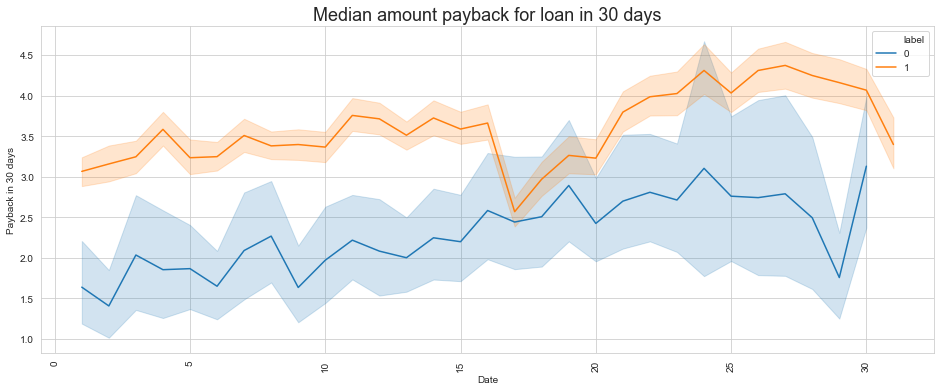

In [41]:
#using lineplot from seaborn to check age on cellular network in days vs payback30

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="payback30",hue='label', data=df)
plt.ylabel('Payback in 30 days')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Median amount payback for loan in 30 days", fontsize=18)
plt.show()

# EDA

In [42]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003435      0.168159      0.166027   
aon                  -0.003435  1.000000      0.000806      0.000015   
daily_decr30          0.168159  0.000806      1.000000      0.977722   
daily_decr90          0.166027  0.000015      0.977722      1.000000   
rental30              0.057900 -0.000789      0.441857      0.434538   
rental90              0.075369 -0.000636      0.458842      0.471647   
last_rech_date_ma     0.004108  0.001738      0.000563      0.000998   
last_rech_date_da     0.001623 -0.001669     -0.001685     -0.001995   
last_rech_amt_ma      0.131734  0.004284      0.275716      0.263983   
cnt_ma_rech30         0.237252 -0.002959      0.451693      0.427045   
fr_ma_rech30          0.001271 -0.001096     -0.000460     -0.000195   
sumamnt_ma_rech30     0.202625  0.000670      0.636648      0.604026   
medianamnt_ma_rech30  0.141349  0.004295      0.295185      0.282735   
medianmarechprebal30 -0.004995  0.003997     -0.001216     -0.000798   
cnt_ma_rech90         0.236303 -0.002607      0.587325      0.593120   
fr_ma_rech90          0.084344  0.004690     -0.078290     -0.079512   
sumamnt_ma_rech90     0.205625  0.000826      0.762918      0.768785   
medianamnt_ma_rech90  0.120756  0.004866      0.257664      0.250290   
medianmarechprebal90  0.039231 -0.000768      0.037210      0.036160   
cnt_da_rech30         0.003790  0.001588      0.000797      0.000756   
fr_da_rech30         -0.000151  0.000935     -0.001348     -0.001418   
cnt_da_rech90         0.003021  0.001100      0.038728      0.031051   
fr_da_rech90         -0.005330  0.005453      0.020413      0.016231   
cnt_loans30           0.196189 -0.001804      0.366137      0.340446   
amnt_loans30          0.197169 -0.001732      0.471569      0.447969   
maxamnt_loans30       0.073871 -0.001411      0.379952      0.373411   
medianamnt_loans30    0.044736  0.004648     -0.011574     -0.005529   
cnt_loans90           0.200103 -0.002450      0.501293      0.503461   
amnt_loans90          0.199740 -0.002386      0.563449      0.567142   
maxamnt_loans90       0.084046 -0.001241      0.400106      0.397106   
medianamnt_loans90    0.035884  0.002731     -0.037338     -0.034716   
payback30             0.048543  0.002130      0.027119      0.019576   
payback90             0.049242  0.002405      0.047276      0.040867   
day                   0.006691  0.000652      0.006661     -0.021323   
month                 0.155063 -0.001769      0.518267      0.539020   

                      rental30  rental90  last_rech_date_ma  \
label                 0.057900  0.075369           0.004108   
aon                  -0.000789 -0.000636           0.001738   
daily_decr30          0.441857  0.458842           0.000563   
daily_decr90          0.434538  0.471647           0.000998   
rental30              1.000000  0.955243          -0.001056   
rental90              0.955243  1.000000          -0.001624   
last_rech_date_ma    -0.001056 -0.001624           1.000000   
last_rech_date_da     0.003274  0.002800           0.001815   
last_rech_amt_ma      0.127102  0.121214          -0.000037   
cnt_ma_rech30         0.233355  0.230410           0.004188   
fr_ma_rech30         -0.001112 -0.000350          -0.001591   
sumamnt_ma_rech30     0.272468  0.259632           0.002094   
medianamnt_ma_rech30  0.129720  0.120107          -0.001295   
medianmarechprebal30 -0.001289 -0.001076           0.004118   
cnt_ma_rech90         0.312008  0.345367           0.004282   
fr_ma_rech90         -0.033611 -0.036646           0.001482   
sumamnt_ma_rech90     0.342164  0.360587           0.002329   
medianamnt_ma_rech90  0.110235  0.103030          -0.000642   
medianmarechprebal90  0.027122  0.029508          -0.001044   
cnt_da_rech30        -0.001023 -0.000462          -0.003471   
fr_da_rech30         -0.002419 -0.002201          -0.003621   
cnt_da_rech90         0.072424  0.056398      

Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

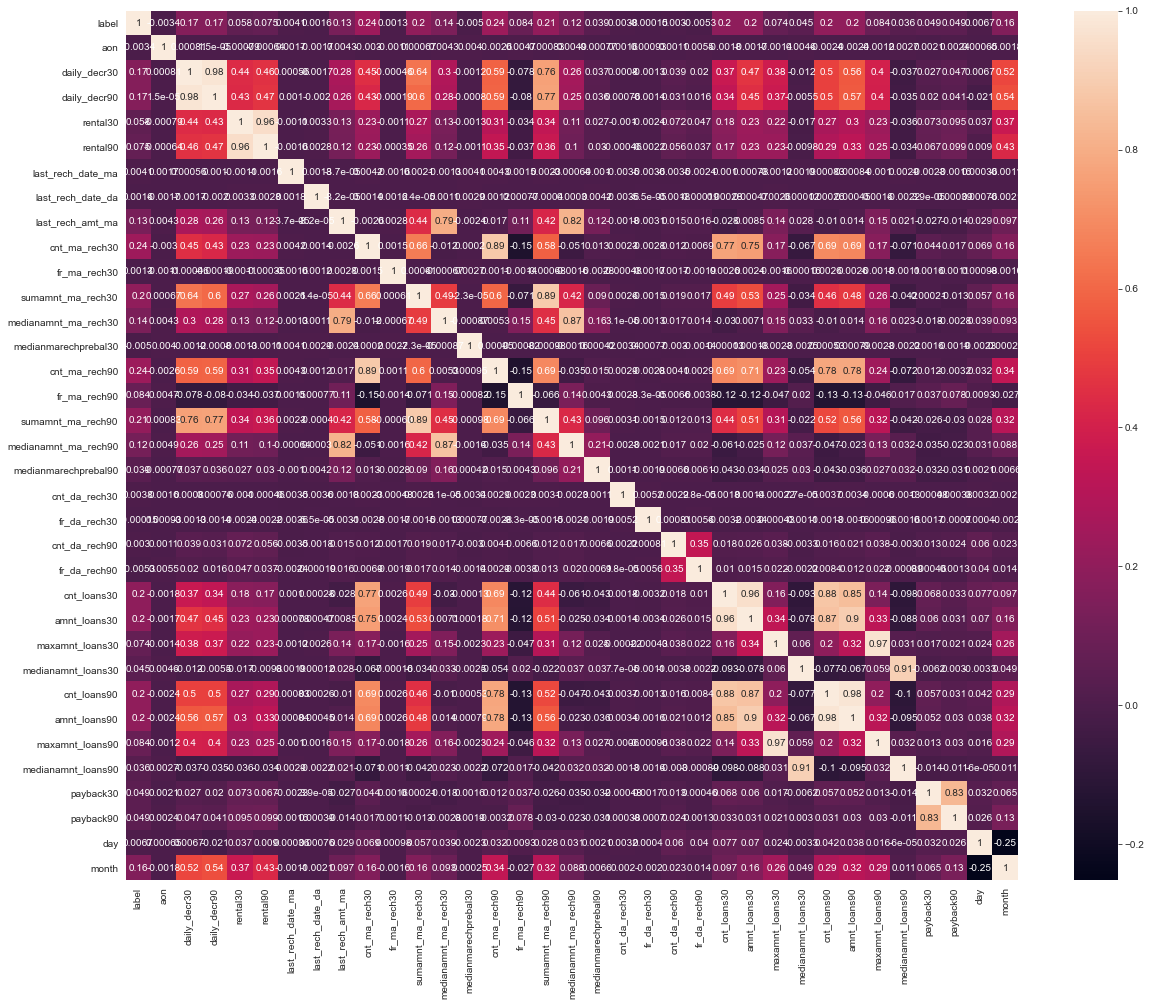

In [43]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Dark color indicates negatively corelated while light color indicates positively corelated So we ca say:
 1. In the Micro Finance Service dataset the correlation graph shows that "daily_decr30, daily_decr90" columns are highly   correlated with each other.
 2. The columns "cnt_loans30, amnt_loans30" are are highly correlated with each other.
 3. The columns "rental30, rental30" are also highly correlated with each other.

Text(0.5, 1.0, 'Correlation with Target Variable')

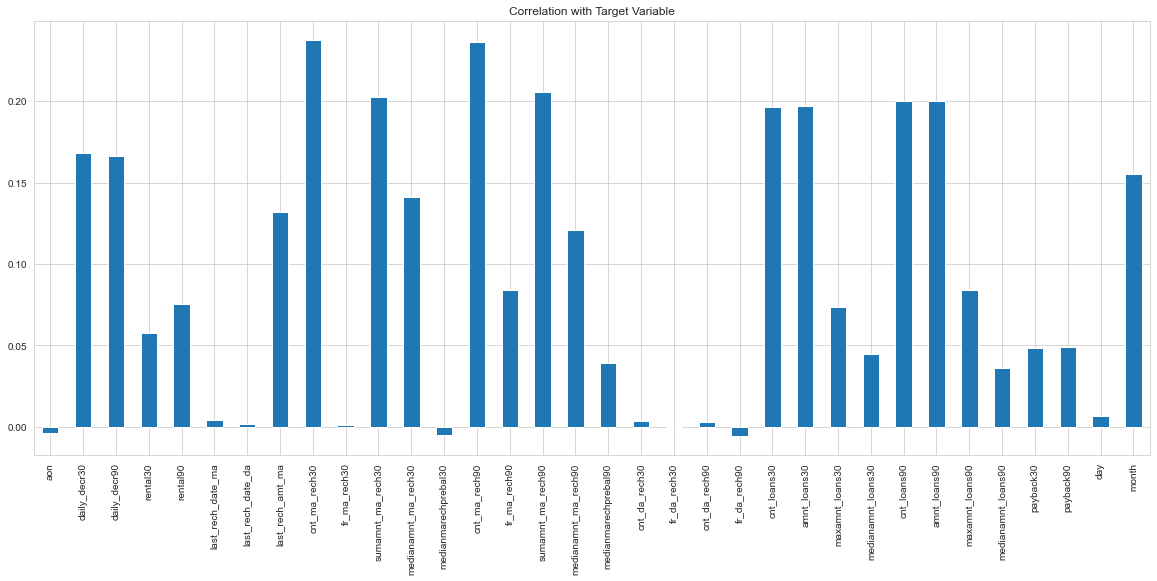

In [44]:
# lets plot a gragh showing correalation with target variable
plt.figure(figsize=(20,8))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable')

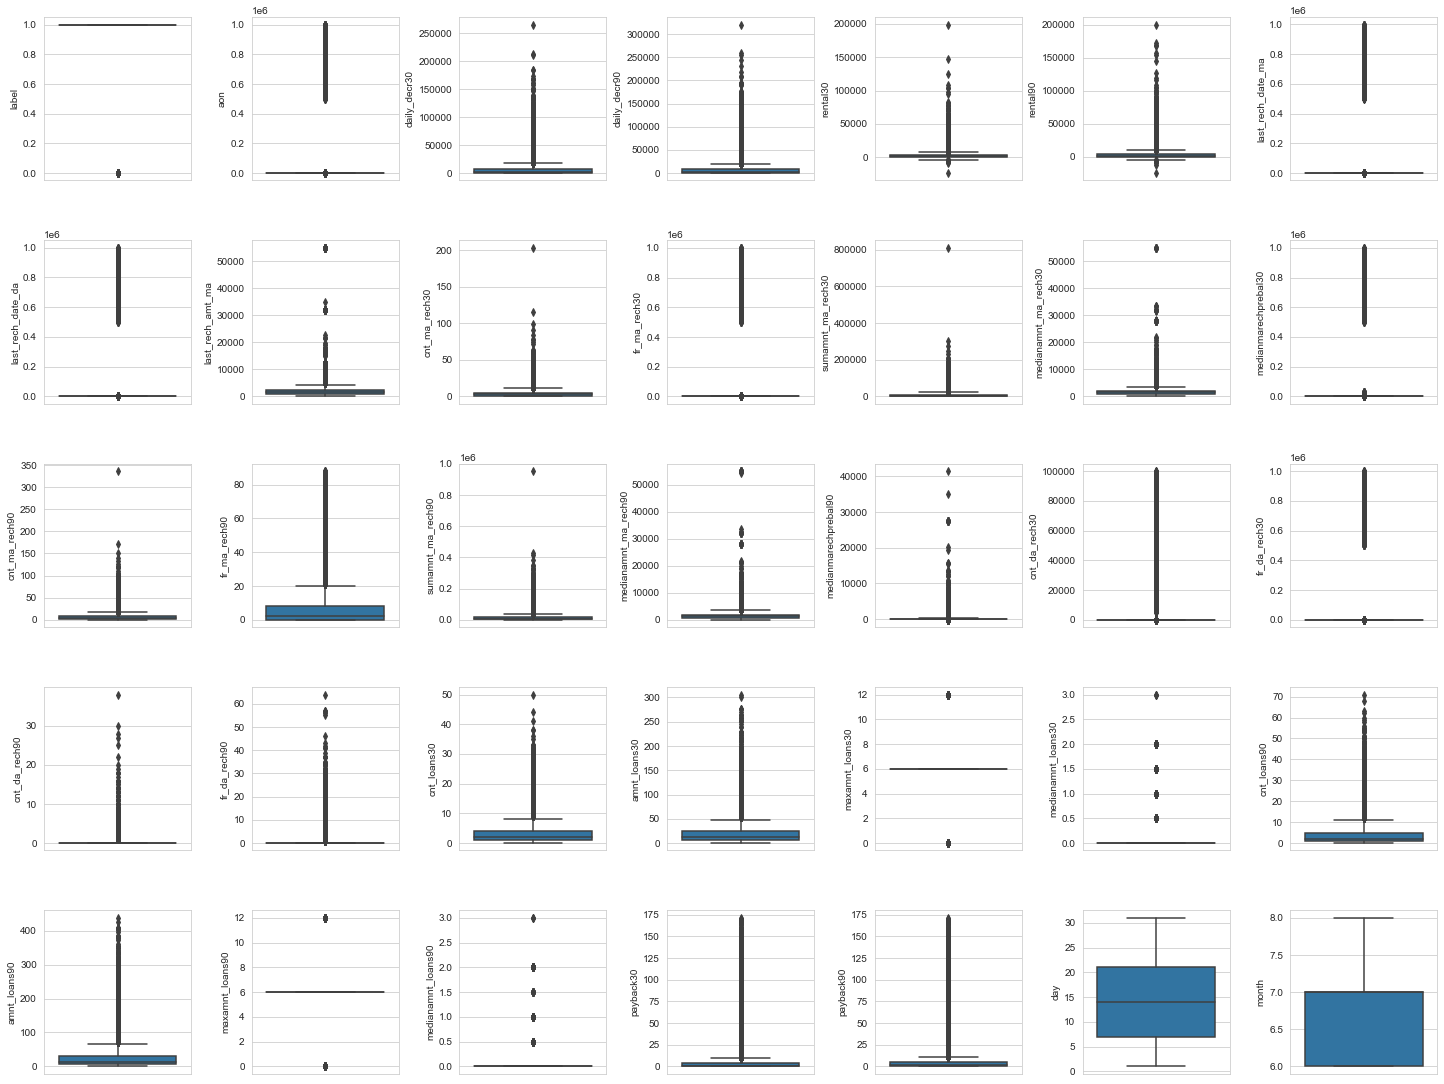

In [45]:
# create box plots to check outliers
fig, ax = plt.subplots(ncols=7, nrows=5, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Observation:We saw the data set contains outliers but after removing it we loss more than 10% data so we change the threshold to 5 instead of 3 it will cause 8.5 data loss

In [46]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<5).all(axis=1)]
print(df.shape)

(208546, 35)
(191157, 35)


In [47]:
# checking skewness
df.skew()

label                   -2.240152
aon                      0.954924
daily_decr30             2.290806
daily_decr90             2.425529
rental30                 2.479708
rental90                 2.610084
last_rech_date_ma        3.090469
last_rech_date_da        9.993291
last_rech_amt_ma         2.217356
cnt_ma_rech30            1.654104
fr_ma_rech30             2.004557
sumamnt_ma_rech30        2.073985
medianamnt_ma_rech30     2.440367
medianmarechprebal30    10.695904
cnt_ma_rech90            1.785762
fr_ma_rech90             2.175253
sumamnt_ma_rech90        2.166327
medianamnt_ma_rech90     2.458169
medianmarechprebal90     4.844105
cnt_da_rech30           37.533500
fr_da_rech30            93.684901
cnt_da_rech90            7.439075
fr_da_rech90            73.957860
cnt_loans30              1.866035
amnt_loans30             1.884546
maxamnt_loans30          1.499398
medianamnt_loans30       4.070883
cnt_loans90              2.064752
amnt_loans90             2.083337
maxamnt_loans9

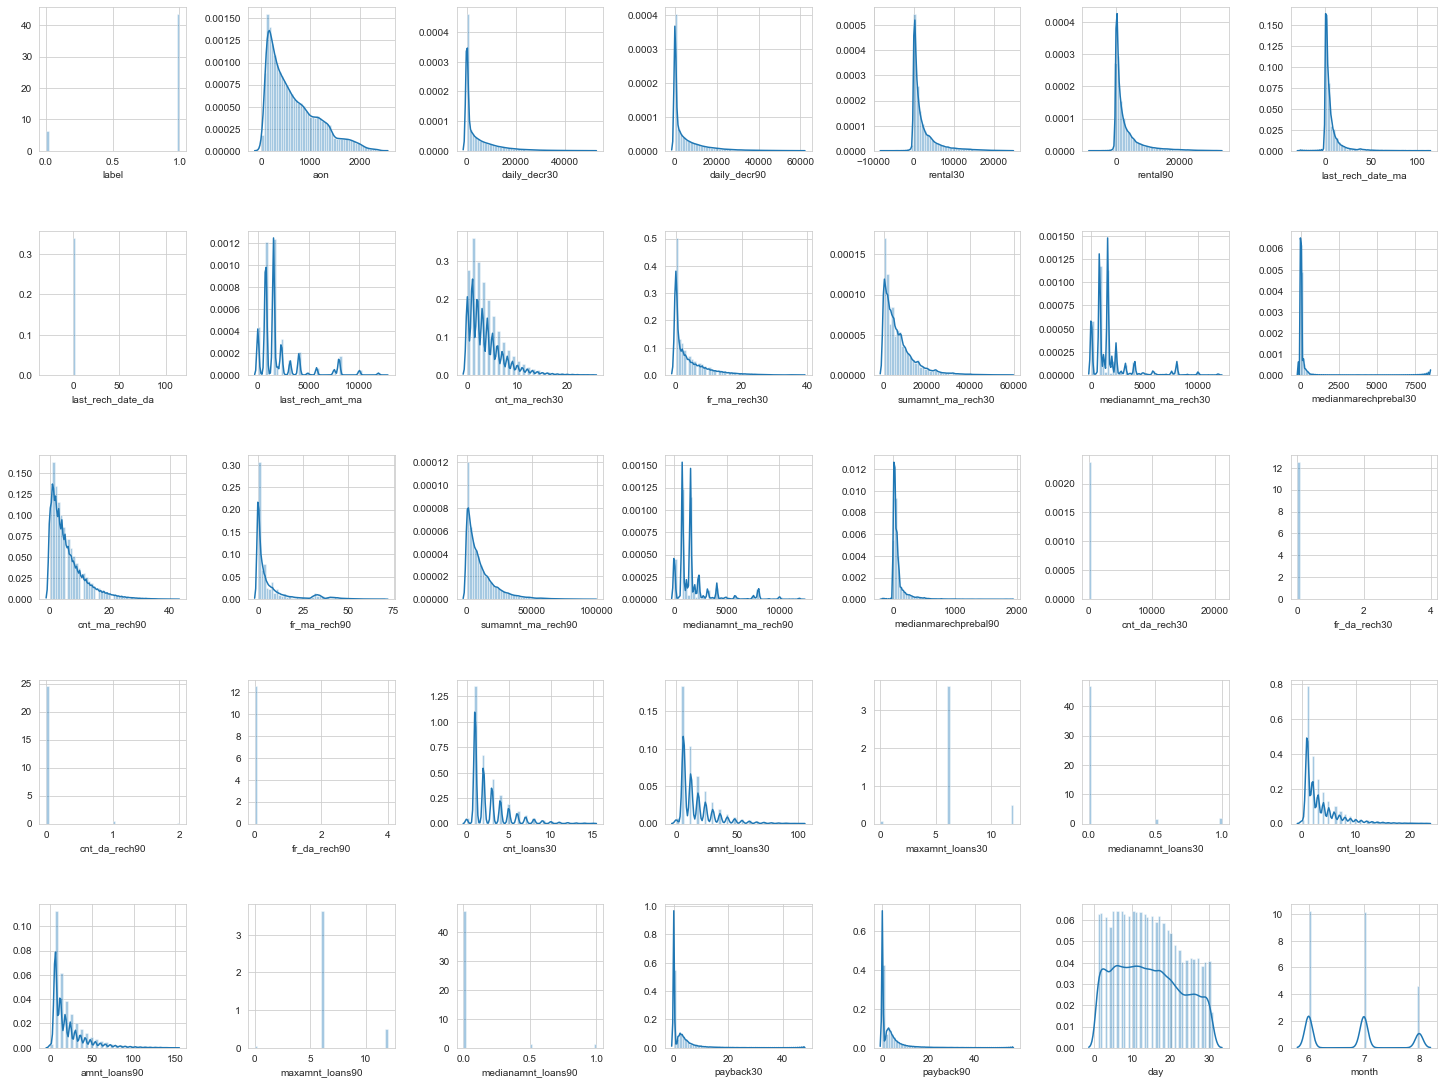

In [48]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=5, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [49]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [50]:
# checking skewness again
df.skew()

label                   -2.240152
aon                      0.067336
daily_decr30             0.454412
daily_decr90             0.513779
rental30                -0.021740
rental90                 0.064928
last_rech_date_ma       -0.513504
last_rech_date_da        7.018995
last_rech_amt_ma        -0.491066
cnt_ma_rech30           -0.693624
fr_ma_rech30             0.112298
sumamnt_ma_rech30       -0.421672
medianamnt_ma_rech30    -0.608602
medianmarechprebal30     0.148591
cnt_ma_rech90           -0.513944
fr_ma_rech90             0.345844
sumamnt_ma_rech90       -0.255147
medianamnt_ma_rech90    -0.598973
medianmarechprebal90    -0.102907
cnt_da_rech30           32.596670
fr_da_rech30            82.354163
cnt_da_rech90            6.718700
fr_da_rech90            64.597632
cnt_loans30              0.071963
amnt_loans30             0.107426
maxamnt_loans30         -4.126112
medianamnt_loans30       3.590846
cnt_loans90              0.529998
amnt_loans90             0.538531
maxamnt_loans9

# Spliting the data into x and y 

In [51]:
#splitting the data into input and output variable
x=df.drop(columns=['label'], axis=1)
y=df['label']

# Class Imbalancement

In [52]:
y.value_counts()

1    166876
0     24281
Name: label, dtype: int64

In [53]:
#!pip install imblearn

In [54]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
# transform the dataset
#x, y = oversample.fit_resample(x, y)

In [55]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
# transform the dataset
x, y = undersample.fit_resample(x, y)

In [56]:
y.value_counts()

1    24281
0    24281
Name: label, dtype: int64

In [57]:
#scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Splitting the data for train and test

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.7845376263571696
[[4257 1018]
 [1284 4125]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      5275
           1       0.80      0.76      0.78      5409

    accuracy                           0.78     10684
   macro avg       0.79      0.78      0.78     10684
weighted avg       0.79      0.78      0.78     10684



Accuracy Score of GaussianNB() is:
0.7537439161362786
[[4186 1089]
 [1542 3867]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5275
           1       0.78      0.71      0.75      5409

    accuracy                           0.75     10684
   macro avg       0.76      0.75      0.75     10684
weighted avg       0.76      0.75      0.75     10684



Accuracy Score of SVC() is:
0.8278734556345938
[[4492  783]
 [1056 4353]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83

# Using Ensemble techniques to boost up accuracy

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [63]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier(),BaggingClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 


Accuracy Score of RandomForestClassifier() is:
0.8554848371396481
[[4453  822]
 [ 722 4687]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5275
           1       0.85      0.87      0.86      5409

    accuracy                           0.86     10684
   macro avg       0.86      0.86      0.86     10684
weighted avg       0.86      0.86      0.86     10684



Accuracy Score of AdaBoostClassifier() is:
0.8251591164357919
[[4427  848]
 [1020 4389]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      5275
           1       0.84      0.81      0.82      5409

    accuracy                           0.83     10684
   macro avg       0.83      0.83      0.83     10684
weighted avg       0.83      0.83      0.83     10684



Accuracy Score of GradientBoostingClassifier() is:
0.8565144140771247
[[4535  740]
 [ 793 4616]]
              precision    recall  f1-score   support

        

# Hyperparameter Tuning for best parameters using Random Search

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Using randomizedsearch CV to find out best parameters in RandomForestClassifier

svc=SVC()
parameters={'C':[1, 10], 'kernel':['rbf','poly','linear']}
clf=RandomizedSearchCV(svc, parameters, n_iter=100)
clf.fit(x_train, y_train)
clf.best_params_

{'kernel': 'rbf', 'C': 10}

In [66]:
#Using randomizedsearch CV to find out best parameters in RandomForestClassifier

rfc=RandomForestClassifier()
parameters={'criterion':('gini', 'entropy'), 'n_estimators':[100, 200, 300]}
clf=RandomizedSearchCV(rfc, parameters, n_iter=100)
clf.fit(x_train, y_train)
clf.best_params_

{'n_estimators': 300, 'criterion': 'entropy'}

In [67]:
#Using randomizedsearch CV to find out best parameters in GradientBoostingClassifier

gbc=GradientBoostingClassifier()
parameters={'n_estimators':[100, 200, 300]}
clf=RandomizedSearchCV(gbc, parameters,  n_iter=100)
clf.fit(x_train, y_train)
clf.best_params_

{'n_estimators': 300}

In [68]:
#Using randomizedsearch CV to find out best parameters in ExtraTreesClassifier

etc=ExtraTreesClassifier()
parameters={'criterion':('gini', 'entropy'), 'n_estimators':[100, 200, 300]}
clf=RandomizedSearchCV(etc, parameters,  n_iter=100)
clf.fit(x_train, y_train)
clf.best_params_

{'n_estimators': 300, 'criterion': 'gini'}

In [69]:
#Using randomizedsearch CV to find out best parameters in BaggingClassifier

bgc=BaggingClassifier()
parameters={'n_estimators':[100, 200, 300]}
clf=RandomizedSearchCV(bgc, parameters,  n_iter=100)
clf.fit(x_train, y_train)
clf.best_params_

{'n_estimators': 300}

# Applying the best parameters to the models


#### Comparing the results of models with accuracy sore, cv score, roc_auc score

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

models=[SVC(C=10, kernel='rbf'),RandomForestClassifier(criterion='entropy', n_estimators=300),
        GradientBoostingClassifier(n_estimators=300),ExtraTreesClassifier(criterion='gini', n_estimators=300),
        BaggingClassifier(n_estimators=300)]
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Model is",m)
    print("Accuracy Score is",accuracy_score(y_test,predm))
    cvscore=cross_val_score(m,x,y, cv=5, scoring='accuracy')
    print("Cross Validation Score is",cvscore.mean())
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print("ROC_AUC Score is",auc_score)
    print('\n') 


Model is SVC(C=10)
Accuracy Score is 0.8494945713216024
Cross Validation Score is 0.8414604715465661
ROC_AUC Score is 0.8496986679213774


Model is RandomForestClassifier(criterion='entropy', n_estimators=200)
Accuracy Score is 0.8586671658554849
Cross Validation Score is 0.8534039516495749
ROC_AUC Score is 0.858551001972314


Model is GradientBoostingClassifier(n_estimators=300)
Accuracy Score is 0.8637214526394609
Cross Validation Score is 0.8569457834411024
ROC_AUC Score is 0.8637892436600749


Model is ExtraTreesClassifier(criterion='entropy')
Accuracy Score is 0.8496817671284164
Cross Validation Score is 0.8419752519212433
ROC_AUC Score is 0.8495876715917564


Model is BaggingClassifier(n_estimators=300)
Accuracy Score is 0.8583863721452639
Cross Validation Score is 0.854186393310075
ROC_AUC Score is 0.8583981410655753




# Best Model

In [71]:
gb=GradientBoostingClassifier(n_estimators=300)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8637214526394609
[[4585  690]
 [ 766 4643]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5275
           1       0.87      0.86      0.86      5409

    accuracy                           0.86     10684
   macro avg       0.86      0.86      0.86     10684
weighted avg       0.86      0.86      0.86     10684



# CROSS VALIDATION

In [72]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(gb,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.85751055 0.85514259 0.85656919 0.85512768 0.86007002]
0.8568840063190842 0.001830821871437554


# AUC ROC CURVE

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

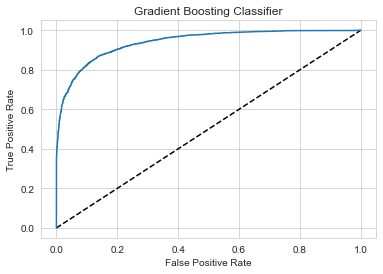

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

In [76]:
auc_score=roc_auc_score(y_test,gb.predict(x_test))
print(auc_score)

0.8637892436600749


# SAVING THE MODEL

In [77]:
# saving the model

import joblib
joblib.dump(gb,'micro_credit_project.obj') 

['micro_credit_project.obj']